In [1]:
import pandas as pd
import numpy as np
import random
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle
%matplotlib inline

In [2]:
def Metric_Comp(predict, true):
    error = predict - true
    error = np.absolute(error)
    error = error/true
    error = np.mean(error)
    return 1 - error

In [3]:
def train_predict(model, X, Y, X_vali):
    model_fitted = model.fit(X,Y)
    Y_vali = model_fitted.predict(X_vali)
    return model_fitted, Y_vali

In [4]:
def test_predict(model, X_test):
    Y_test = model.predict(X_test)
    return Y_test

## Reading files from folder

In [7]:
training_data = pd.read_csv('..\\..\\Bitcoin_Data2\\train_timeseries2.csv')

In [8]:
test_data = pd.read_csv('..\\..\\Bitcoin_Data2\\test_timeseries2.csv')

In [7]:
training_data.head()

,date,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
0,2016-04-24,458.55,0.728040,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,...,0.766667,4.266667,36783070.63,27228.75866,36724621,36825214,6,2,0,4
1,2016-04-25,461.43,0.874485,66133.73765,0.888460,6.861613,1.786780e+11,168025613.1,362233.4608,1128032.650,...,0.700000,8.016667,36870963.17,17998.12914,36825828,36893715,25,7,8,10
2,2016-04-26,466.09,0.813180,66256.52779,1.129962,7.675906,1.786780e+11,170332016.5,363972.8546,1341204.175,...,0.083333,9.500000,36931936.13,16768.83707,36895435,36980350,32,14,14,4
3,2016-04-27,444.69,0.875343,66369.44708,0.873767,6.111057,1.786780e+11,167458968.2,374368.9346,1145796.944,...,0.433333,13.300000,37022472.54,16423.15703,36983148,37044068,18,8,4,6
4,2016-04-28,449.01,0.898219,66491.60486,0.904082,6.261128,1.786660e+11,171720826.0,381601.8356,1207843.183,...,0.600000,11.250000,37077491.25,18568.44670,37046272,37106607,24,12,7,5


In [9]:
x_trained_columns = list(training_data.columns[2:])
y_trained_columns = 'close'

In [36]:
?train_predict

In [9]:
model_log = LinearRegression()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [10]:
test_pred

array([ 8.71173538,  8.66666884,  8.78573248,  8.90229548,  8.78901826,
        8.82065061,  8.7809038 ,  8.75209178,  8.71223736,  8.75583507,
        8.75775924,  8.77500794,  8.71140207,  8.67802736,  8.65276612,
        8.82175439,  8.66358679,  8.82678699,  8.76394491,  8.92173235,
        8.85031178,  8.80883331,  8.82762603,  8.87564826,  8.73608177,
        8.7527589 ,  8.69608852,  8.71883392,  8.84324604,  8.78992586,
        8.80449358,  8.75621813,  8.79784443,  8.79292641,  8.79147833,
        8.76233067,  8.82009607,  8.81783945,  8.70846287,  8.72470514,
        8.67668608,  8.77947077,  8.76855232,  8.76714136,  8.64703599,
        8.78393039,  8.78077675,  8.82827438,  8.78896777,  8.77279291,
        8.64805247,  8.67563285,  8.79446066,  8.79888827,  8.74697272,
        8.7677309 ,  8.71864523,  8.77808201,  8.7763383 ,  8.71960884,
        8.76288806,  8.70457214,  8.67920943,  8.71634266,  8.76526552,
        8.70070471,  8.65645653,  8.67438301,  8.59817455,  8.69

In [11]:
test_data['close'] = np.exp(test_pred)

In [12]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
   

In [13]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.91063949215474094

In [123]:
#inter
#test_data.head()

### taking log of some values

In [10]:
min_max = dict()
for col in x_trained_columns:
    min_max[col] = [training_data[col].min(), training_data[col].max()]

In [11]:
'''log of variables with greater values'''
log_col = []
for key in min_max.keys():
    if min_max[key][0] > 10000:
        log_col.append(key)


In [12]:
log_col

['blocks_size',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_max',
 'utxo_count_mean',
 'utxo_count_min',
 'utxo_count_max']

In [11]:
log_col = log_col + ['cost_per_transaction','transaction_fees','mempool_count_mean','mempool_count_max','mempool_growth_stddev','mempool_growth_max','utxo_count_stddev']

In [13]:
training_data[log_col] = np.log(training_data[log_col])

In [14]:
test_data[log_col] = np.log(test_data[log_col])

In [14]:
model_log = LinearRegression()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [15]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
   

In [16]:
y_pred

array([ 6.13388386,  6.14163786,  6.14742989,  6.10480146,  6.10882363,
        6.12541691,  6.10042534,  6.11717695,  6.09359071,  6.11397266,
        6.10983787,  6.10648143,  6.13689724,  6.12899972,  6.13075281,
        6.13945756,  6.11330203,  6.11794861,  6.11555401,  6.12532453,
        6.1167016 ,  6.12435165,  6.12273482,  6.11696269,  6.12226999,
        6.08620215,  6.09256973,  6.09760833,  6.08621155,  6.09622149,
        6.09957093,  6.10124047,  6.11264748,  6.15609566,  6.26276018,
        6.23947803,  6.26632433,  6.278093  ,  6.29430779,  6.29212278,
        6.34275219,  6.35103171,  6.35220855,  6.37052084,  6.35401842,
        6.35307989,  6.35278802,  6.36005122,  6.38989983,  6.49922628,
        6.56578878,  6.54180105,  6.55077827,  6.65038276,  6.61538085,
        6.62720522,  6.63843309,  6.6125915 ,  6.51346832,  6.38078184,
        6.44032759,  6.49156782,  6.49870104,  6.43925216,  6.47587213,
        6.47513561,  6.46870488,  6.51768287,  6.51878191,  6.55

In [17]:
training_data['close'].values

array([   458.55,    461.43,    466.09,    444.69,    449.01,    455.1 ,
          448.32,    451.88,    444.67,    450.3 ,    446.72,    447.98,
          459.6 ,    458.54,    458.55,    460.48,    450.89,    452.73,
          454.77,    455.67,    455.67,    457.57,    454.16,    453.78,
          454.62,    438.71,    442.68,    443.19,    439.32,    444.15,
          445.98,    449.6 ,    453.38,    473.46,    530.04,    526.23,
          533.86,    531.39,    536.92,    537.97,    569.19,    572.73,
          574.98,    585.54,    576.6 ,    581.65,    574.63,    577.47,
          606.73,    672.78,    704.38,    685.56,    694.47,    766.31,
          748.91,    756.23,    763.78,    737.23,    666.65,    596.12,
          623.98,    665.3 ,    665.12,    629.37,    655.28,    647.  ,
          639.89,    673.34,    676.3 ,    703.7 ,    658.66,    683.66,
          670.63,    677.33,    640.56,    666.52,    650.96,    649.36,
          647.66,    664.55,    654.47,    658.08, 

In [18]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.9904507414535676

### Permutation Importance

In [86]:
?Metric_Comp
x_trained_columns = list(training_data.columns[2:])
x_trained_columns.remove('news_stories_total')

In [87]:
x_trained_columns

['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'transaction_fees',
 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
 'transactions_per_sec_mean',
 'transactions_per_sec_stddev',
 'transactions_per_sec_min',
 'transactions_per_sec_max',
 'utxo_count_mean',
 'utxo_count_stddev',
 'utxo_count_min',
 'utxo_count_max',
 'news_stories_positive',


In [17]:
start = datetime.now()
model_log = LinearRegression(normalize=True)
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)
perm = PermutationImportance(model_log, random_state=1, scoring='neg_mean_absolute_error').fit(training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values))
eli5.show_weights(perm, feature_names = training_data[x_trained_columns].columns.tolist())
end = datetime.now()

In [18]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.9904091329291167

In [22]:
coef_ = pd.DataFrame(x_trained_columns, columns = ['colum'])
coef_['coeff'] = model_log.coef_

In [23]:
coef_['feature_import'] = perm.feature_importances_

In [24]:
coef_.sort_values(['feature_import'],ascending=False)

,colum,coeff,feature_import
41,news_stories_total,-8.556996e-03,4.822645
43,news_stories_negative,8.555076e-03,2.302714
42,news_stories_positive,8.555322e-03,1.986077
5,est_transaction_volume_USD,1.010709e+00,1.077247
39,utxo_count_min,4.025886e+00,0.633149
37,utxo_count_mean,-3.943761e+00,0.611326
44,news_stories_neutral,8.556642e-03,0.605016
6,est_transaction_volume,-1.005378e+00,0.549057
7,hash_rate,1.778147e-02,0.018457
1,blocks_size,-4.901147e-02,0.011588


In [29]:
coef_.to_csv('..\\..\\intermediate_files\\feature_importance_PI.csv', index=None)

### Subsetting using feature importance data

In [25]:
x_trained_columns = coef_[coef_['feature_import'] > 0.011]['colum'].values.tolist()

In [31]:
x_trained_columns.remove('news_stories_total')

In [26]:
model_log = LinearRegression(normalize=True)
#x_trained_columns = list(training_data.columns)
#x_trained_columns.remove('close')
#x_trained_columns.remove('date')
#x_trained_columns.remove('close_lag_1')
#model_log = RandomForestRegressor(n_estimators=500, max_depth=5)
from sklearn.linear_model import Ridge
#model_log = Ridge()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [27]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)

In [28]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.99032755868055178

In [29]:
Metric_Comp(np.exp(test_pred), inter['close'].values)

0.98511939660807202

In [176]:
rf_imp = pd.DataFrame(x_trained_columns, columns = ['colum'])
rf_imp['feature_import'] = model_log.feature_importances_

In [178]:
rf_imp.sort_values(['feature_import'],ascending=False)

,colum,feature_import
3,cost_per_transaction,6.074992e-01
9,miners_revenue,2.417492e-01
1,blocks_size,6.067775e-02
16,total_bitcoins,5.750323e-02
39,utxo_count_min,8.608060e-03
37,utxo_count_mean,8.129878e-03
40,utxo_count_max,6.844202e-03
18,transaction_fees_USD,4.524100e-03
32,wallets_created,2.421789e-03
4,difficulty,1.524751e-03


In [179]:
coef_

,colum,coeff,feature_import
0,avg_block_size,1.722257e-02,0.000623
1,blocks_size,-4.901031e-02,0.011588
2,cost_per_transaction_percent,3.165935e-03,0.000407
3,cost_per_transaction,-5.273208e-05,0.000416
4,difficulty,-2.788377e-04,0.000007
5,est_transaction_volume_USD,1.010708e+00,1.077246
6,est_transaction_volume,-1.005376e+00,0.549056
7,hash_rate,1.778770e-02,0.018465
8,median_confirmation_time,2.214686e-04,0.000054
9,miners_revenue,-9.847899e-03,0.007094


### testing the variables

In [20]:
inter = pd.read_csv('..\\..\\submission\\Next_day_open.csv')

In [35]:
test_data['close'] = np.exp(test_pred)
test_data[['date','close']].to_csv('..\\..\\submission\\6th_submission.csv', index=None)

In [60]:
test_predict

<function __main__.test_predict>

In [21]:
Metric_Comp(np.exp(test_pred), inter['close'].values)

0.97847795634335355

### Lets look at some plots

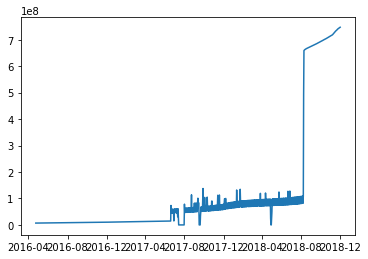

In [180]:
plt.plot(pd.to_datetime(training_data['date']),training_data['wallets_created'])

In [34]:
x_trained_columns

['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'transaction_fees',
 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
 'transactions_per_sec_mean',
 'transactions_per_sec_stddev',
 'transactions_per_sec_min',
 'transactions_per_sec_max',
 'utxo_count_mean',
 'utxo_count_stddev',
 'utxo_count_min',
 'utxo_count_max',
 'news_stories_total',
 'n

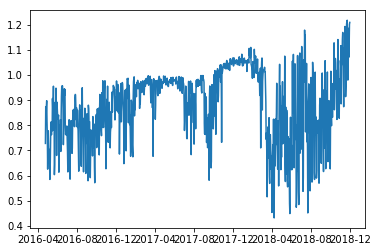

In [37]:
plt.plot(pd.to_datetime(training_data['date']),training_data['avg_block_size'])

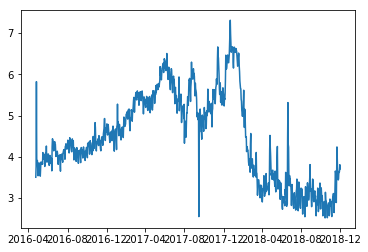

In [48]:
plt.plot(pd.to_datetime(training_data['date']),np.log(training_data['transaction_fees']))

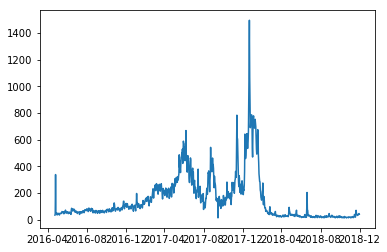

In [49]:
plt.plot(pd.to_datetime(training_data['date']),training_data['transaction_fees'])